<a href="https://colab.research.google.com/github/minnieting6675/Taiwan-AQI_Air-Pollution-Analysis/blob/main/Taiwan_AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('AQI.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sitename     85 non-null     object 
 1   county       85 non-null     object 
 2   aqi          85 non-null     int64  
 3   pollutant    4 non-null      object 
 4   status       85 non-null     object 
 5   so2          81 non-null     float64
 6   co           80 non-null     float64
 7   o3           80 non-null     float64
 8   o3_8hr       82 non-null     float64
 9   pm10         78 non-null     float64
 10  pm2.5        78 non-null     float64
 11  no2          78 non-null     float64
 12  nox          78 non-null     float64
 13  no           78 non-null     float64
 14  wind_speed   80 non-null     object 
 15  wind_direc   80 non-null     object 
 16  publishtime  85 non-null     object 
 17  co_8hr       85 non-null     float64
 18  pm2.5_avg    83 non-null     float64
 19  pm10_avg  

In [ ]:
df.columns

Index(['sitename', 'county', 'aqi', 'pollutant', 'status', 'so2', 'co', 'o3',
       'o3_8hr', 'pm10', 'pm2.5', 'no2', 'nox', 'no', 'wind_speed',
       'wind_direc', 'publishtime', 'co_8hr', 'pm2.5_avg', 'pm10_avg',
       'so2_avg', 'longitude', 'latitude', 'siteid'],
      dtype='object')

In [ ]:
df.head(5)

,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,...,wind_speed,wind_direc,publishtime,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
0,基隆,基隆市,21,NaN,良好,1.6,0.12,26.4,23.5,7.0,...,2.6,135,2024/07/05 13:00:00,0.1,2.5,10.0,1.0,121.760056,25.129167,1
1,汐止,新北市,25,NaN,良好,1.7,0.13,51.6,27.6,11.0,...,1.7,308,2024/07/05 13:00:00,0.2,4.9,13.0,1.0,121.640810,25.066240,2
2,萬里,新北市,24,NaN,良好,1.3,0.16,37.3,26.8,9.0,...,1.2,14,2024/07/05 13:00:00,0.1,5.2,12.0,0.0,121.689881,25.179667,3
3,新店,新北市,31,NaN,良好,1.3,0.18,57.3,29.2,18.0,...,1.8,139,2024/07/05 13:00:00,0.2,9.5,15.0,0.0,121.537778,24.977222,4
4,土城,新北市,31,NaN,良好,1.4,0.22,68.5,33.8,18.0,...,1.7,141,2024/07/05 13:00:00,0.3,6.5,20.0,1.0,121.451861,24.982528,5


In [ ]:
df.describe()

,aqi,so2,co,o3,o3_8hr,pm10,pm2.5,no2,nox,no,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude,siteid
count,85.000000,81.000000,80.000000,80.000000,82.000000,78.000000,78.000000,78.000000,78.000000,78.000000,85.000000,83.000000,84.000000,84.000000,85.000000,85.000000,85.000000
mean,31.635294,1.344444,0.161750,45.663750,27.984146,18.807692,8.551282,5.535897,7.234615,1.664103,0.156471,8.938554,19.761905,0.630952,120.817637,24.025889,57.423529
std,10.120520,0.830963,0.092638,15.096368,6.294373,8.734255,4.574484,5.266902,7.482808,2.514166,0.140108,3.812522,7.133189,0.554929,0.601926,0.999218,64.085393
min,11.000000,0.000000,0.020000,14.600000,11.800000,3.000000,0.000000,0.400000,1.100000,0.100000,0.000000,1.300000,3.000000,0.000000,118.312256,21.958069,1.000000
25%,25.000000,0.800000,0.110000,36.875000,24.475000,12.250000,5.250000,2.325000,3.225000,0.700000,0.100000,6.750000,15.000000,0.000000,120.345531,23.048197,22.000000
50%,30.000000,1.300000,0.140000,45.250000,27.650000,18.000000,8.000000,3.900000,5.400000,1.100000,0.100000,8.700000,19.500000,1.000000,120.678444,24.131672,43.000000
75%,38.000000,1.700000,0.190000,56.725000,32.200000,23.000000,11.000000,6.675000,8.075000,1.400000,0.200000,11.650000,25.000000,1.000000,121.432500,24.994711,65.000000
max,58.000000,5.800000,0.520000,76.000000,42.900000,44.000000,21.000000,28.200000,44.500000,16.600000,0.900000,18.500000,38.000000,2.000000,121.792928,26.153736,313.000000


In [ ]:
np.unique(df['siteid'].values).size

85

In [ ]:
df = df.set_index('siteid')

In [ ]:
df.head(10)

,sitename,county,aqi,pollutant,status,so2,co,o3,o3_8hr,pm10,...,no,wind_speed,wind_direc,publishtime,co_8hr,pm2.5_avg,pm10_avg,so2_avg,longitude,latitude
siteid,,,,,,,,,,,,,,,,,,,,,
1,基隆,基隆市,21,NaN,良好,1.6,0.12,26.4,23.5,7.0,...,1.0,2.6,135,2024/07/05 13:00:00,0.1,2.5,10.0,1.0,121.760056,25.129167
2,汐止,新北市,25,NaN,良好,1.7,0.13,51.6,27.6,11.0,...,1.3,1.7,308,2024/07/05 13:00:00,0.2,4.9,13.0,1.0,121.640810,25.066240
3,萬里,新北市,24,NaN,良好,1.3,0.16,37.3,26.8,9.0,...,1.6,1.2,14,2024/07/05 13:00:00,0.1,5.2,12.0,0.0,121.689881,25.179667
4,新店,新北市,31,NaN,良好,1.3,0.18,57.3,29.2,18.0,...,1.2,1.8,139,2024/07/05 13:00:00,0.2,9.5,15.0,0.0,121.537778,24.977222
5,土城,新北市,31,NaN,良好,1.4,0.22,68.5,33.8,18.0,...,0.6,1.7,141,2024/07/05 13:00:00,0.3,6.5,20.0,1.0,121.451861,24.982528
6,板橋,新北市,31,NaN,良好,2.0,0.27,69.1,33.1,16.0,...,0.8,1.7,47,2024/07/05 13:00:00,0.3,8.0,18.0,1.0,121.458667,25.012972
7,新莊,新北市,31,NaN,良好,0.9,0.17,65.9,33.7,32.0,...,0.9,3.2,24,2024/07/05 13:00:00,0.3,9.2,27.0,0.0,121.432500,25.037972
8,菜寮,新北市,32,NaN,良好,1.9,0.20,64.6,30.6,21.0,...,0.7,3.2,292,2024/07/05 13:00:00,0.3,9.9,14.0,1.0,121.481028,25.068950
9,林口,新北市,31,NaN,良好,0.6,0.12,55.3,33.7,17.0,...,1.4,2.7,342,2024/07/05 13:00:00,0.1,7.1,15.0,0.0,121.365490,25.077989


In [ ]:
#我查看各欄位有多少空值
df.isnull().sum()

sitename        0
county          0
aqi             0
pollutant      81
status          0
so2             4
co              5
o3              5
o3_8hr          3
pm10            7
pm2.5           7
no2             7
nox             7
no              7
wind_speed      5
wind_direc      5
publishtime     0
co_8hr          0
pm2.5_avg       2
pm10_avg        1
so2_avg         1
longitude       0
latitude        0
dtype: int64

In [ ]:
#計算每個縣市的 AQI 平均值, 顯示出臺東縣的空氣質量最好, 而高雄市的空氣質量最差。
county_aqi = df.groupby('county')['aqi'].mean().sort_values(ascending = False)
county_aqi

county
高雄市    43.000000
臺南市    36.600000
彰化縣    36.400000
嘉義縣    36.000000
嘉義市    35.000000
屏東縣    34.600000
雲林縣    32.250000
桃園市    31.666667
新北市    30.230769
南投縣    29.333333
臺中市    29.166667
新竹縣    28.000000
臺北市    27.428571
苗栗縣    26.666667
連江縣    24.000000
新竹市    21.000000
基隆市    21.000000
澎湖縣    21.000000
金門縣    20.000000
宜蘭縣    19.000000
花蓮縣    15.000000
臺東縣    11.000000
Name: aqi, dtype: float64

In [ ]:
#我把狀態轉換成百分比, 可看出台灣95%空氣是良好的, 5%空氣質量為普通
quantity_status = df['status'].value_counts(normalize=True) * 100
print(quantity_status)

status
良好    95.294118
普通     4.705882
Name: proportion, dtype: float64


<Axes: ylabel='proportion'>

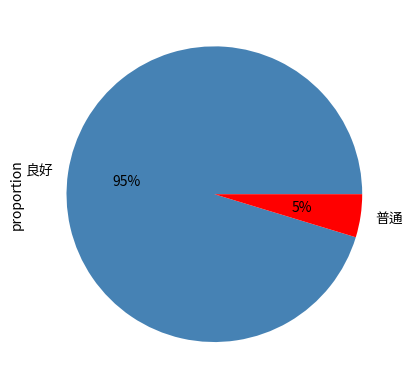

In [ ]:
#呈現圓餅圖
colors = ['steelblue','red']
quantity_status.plot(kind='pie', y='良好', autopct='%1.0f%%', colors=colors)

In [ ]:
#其中空氣質量為普通(有標示汙染物的地區) 為高雄市以及彰化縣
pollutant_area = df.groupby('county')['pollutant'].value_counts()
pollutant_area

county  pollutant
彰化縣     細懸浮微粒        1
高雄市     細懸浮微粒        3
Name: count, dtype: int64

In [ ]:
#我用corr 計算每個維度的相關性(只計算數字的值), 由此可知除了經緯度以外, 其他汙染物增加, AQI值就會增加
numeric_df = df.select_dtypes(include=[float, int])
correlation = numeric_df.corr()
correlation_aqi = correlation['aqi'].sort_values(ascending=False)
print(correlation_aqi)

aqi          1.000000
pm2.5_avg    0.916489
pm10_avg     0.793089
pm2.5        0.729459
o3_8hr       0.630218
pm10         0.550400
o3           0.400827
co           0.307878
no2          0.287583
nox          0.273100
so2          0.254386
co_8hr       0.239701
so2_avg      0.237476
no           0.212215
longitude   -0.298563
latitude    -0.388413
Name: aqi, dtype: float64


Text(0.5, 1.0, 'correlation')

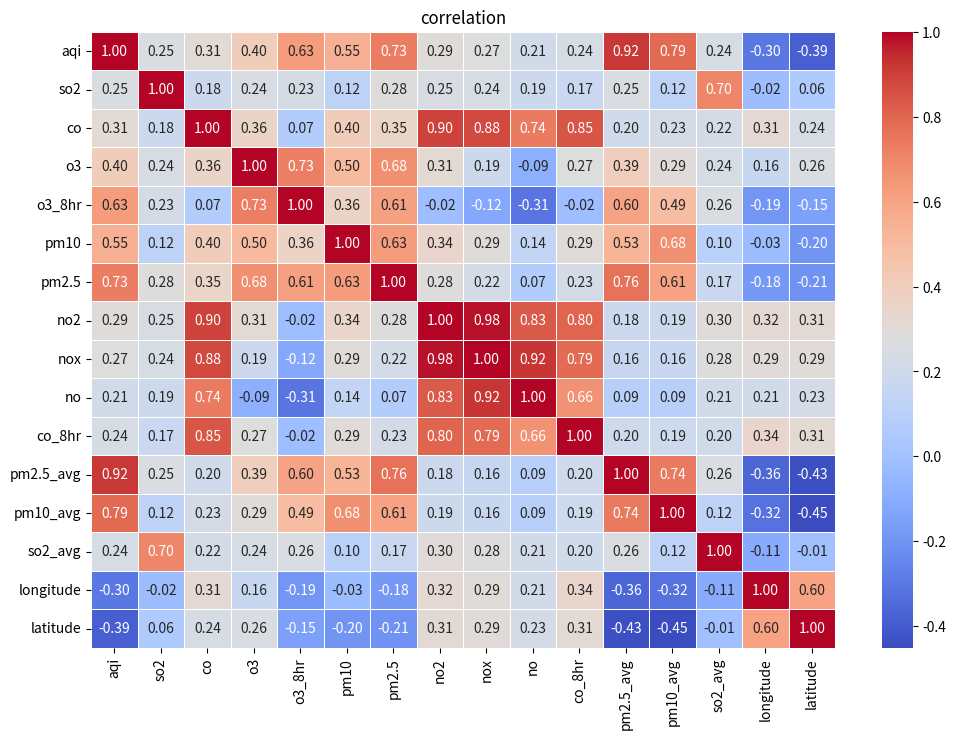

In [ ]:
#使用 seaborn 庫的 heatmap 函數來繪製相關矩陣的熱圖
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('correlation')

In [ ]:
import matplotlib as mpl
import matplotlib.font_manager as fm

In [ ]:
fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')